<a href="https://colab.research.google.com/github/ToshiroHJJZ/Detection-and-Classification-of-Linguistic-Features-for-Effective-Spam-Identification/blob/main/EDA_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# encountered an utf-8 error,UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607:
#invalid continuation byte, encoding pandas to use 'latin-1', or 'ISO-8859-1'
df = pd.read_csv("/content/drive/MyDrive/HThesis/spam.csv", encoding='latin-1')


In [ ]:
len(df)

5572

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#remove the 3 and 4rth column
df = df.drop(df.columns[[2,3,4]], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [ ]:
# select only ham part
df=df[df['v1']=='ham']

In [ ]:
df['v1'].value_counts()

,count
v1,
ham,4825


In [ ]:
x=df['v2']
y=df['v1']

v2= Text
v1= ham

Stop word removal

In [ ]:
# word cloud on X
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(x))

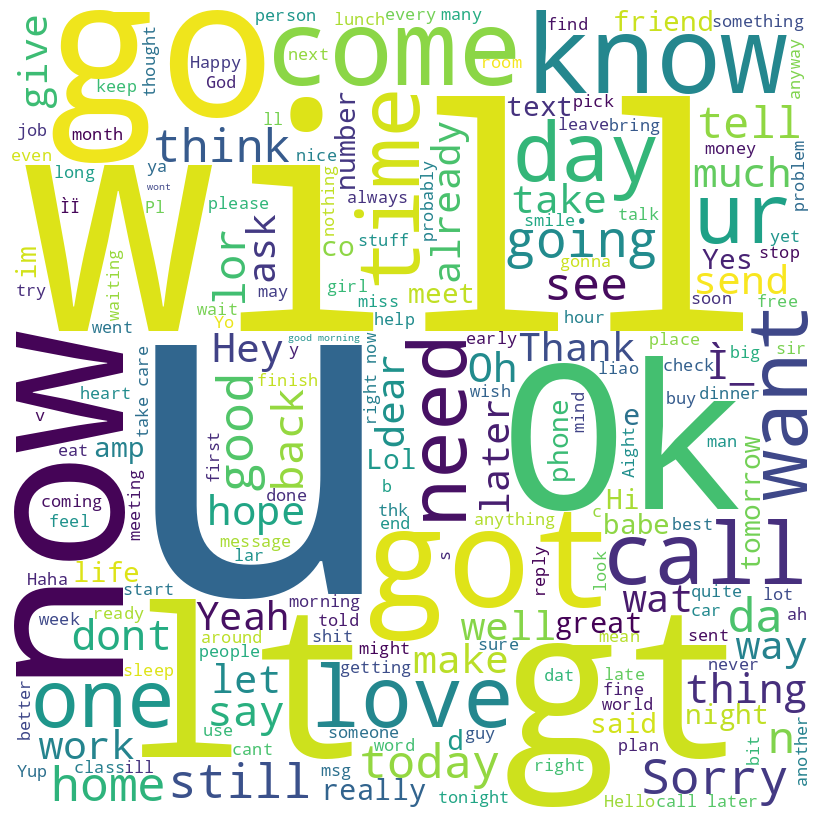

In [ ]:
# plot the word cloud #we are not using word cloud for this EDA, since it is useless.
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

(0.11620829672984319, 0.2939309895665034, -1.0, 1.0, 0.0)

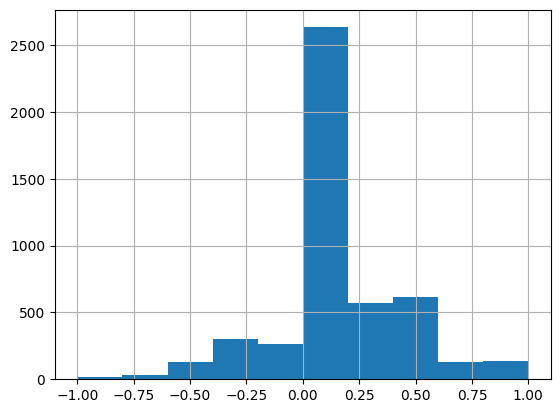

In [ ]:
#polarity distribution
from textblob import TextBlob
df['polarity'] = df['v2'].apply(lambda x: TextBlob(x).sentiment.polarity)
#plot it histogram
df['polarity'].hist()
df['polarity'].mean(), df['polarity'].std(), df['polarity'].min(), df['polarity'].max(), df['polarity'].median()

(14.20062176165803, 11.424510670386343, 1, 171, 11.0)

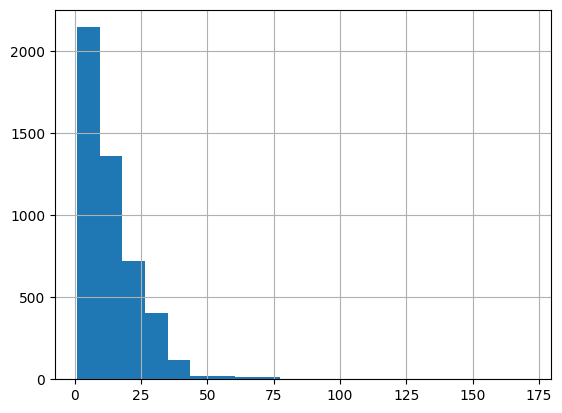

In [ ]:
# histogram of average word length
df['word_count'] = df['v2'].apply(lambda x: len(x.split()))
df['word_count'].hist(bins=20)
df['word_count'].mean(), df['word_count'].std(), df['word_count'].min(), df['word_count'].max(), df['word_count'].median()

(71.02362694300518, 2, 910, 52.0, (2, 910))

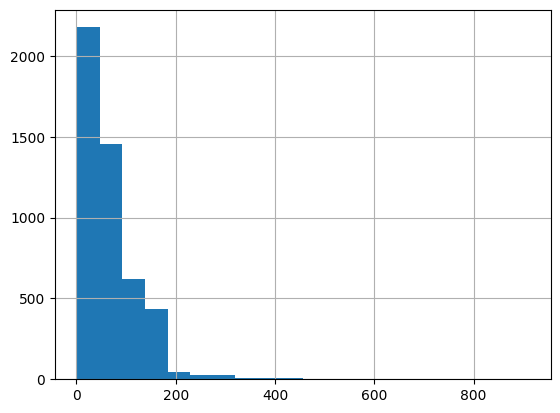

In [ ]:
# histogram for text length
df['text_length'] = df['v2'].apply(lambda x: len(x))
df['text_length'].hist(bins=20)
# Instead of extreme_values(), use min() and max() to get the extreme values
df['text_length'].mean(), df['text_length'].min(), df['text_length'].max(), df['text_length'].median(), (df['text_length'].min(), df['text_length'].max())

###Data split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


###Logistic Regression

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
# Fix the import statement by changing 'sklearn.metric' to 'sklearn.metrics'
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Ramdom forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rd = rf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rd))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



#EDA